In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pwd


'/Users/vivek/Desktop/recommend'

In [3]:
df = pd.read_csv("/Users/vivek/Desktop/recommend/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
print(df.size)
print(df.shape)
print(df['label'].unique())

17600
(2200, 8)
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [7]:
X = df.drop('label', axis = 1)
y = df['label']

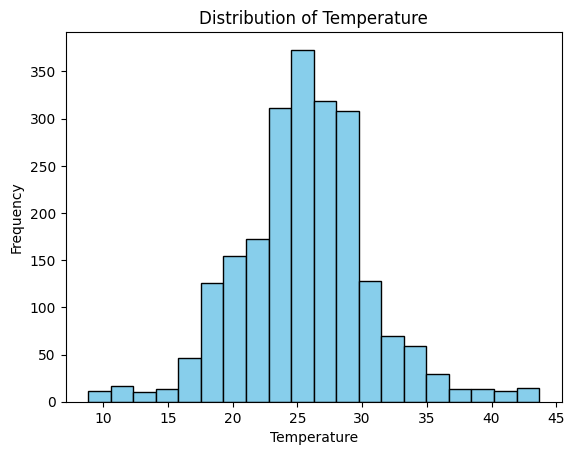

In [8]:
plt.hist(df['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

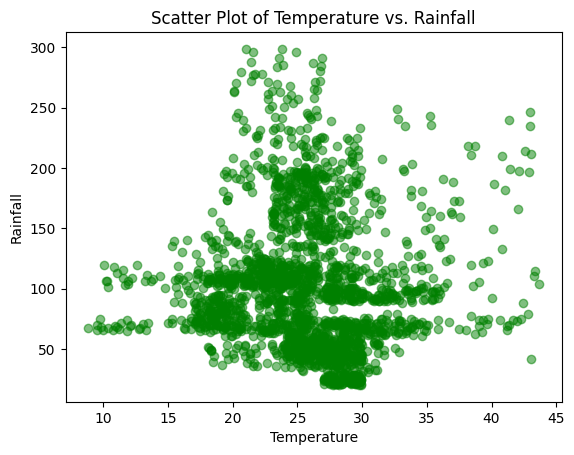

In [9]:
plt.scatter(df['temperature'], df['rainfall'], color='green', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Scatter Plot of Temperature vs. Rainfall')
plt.show()

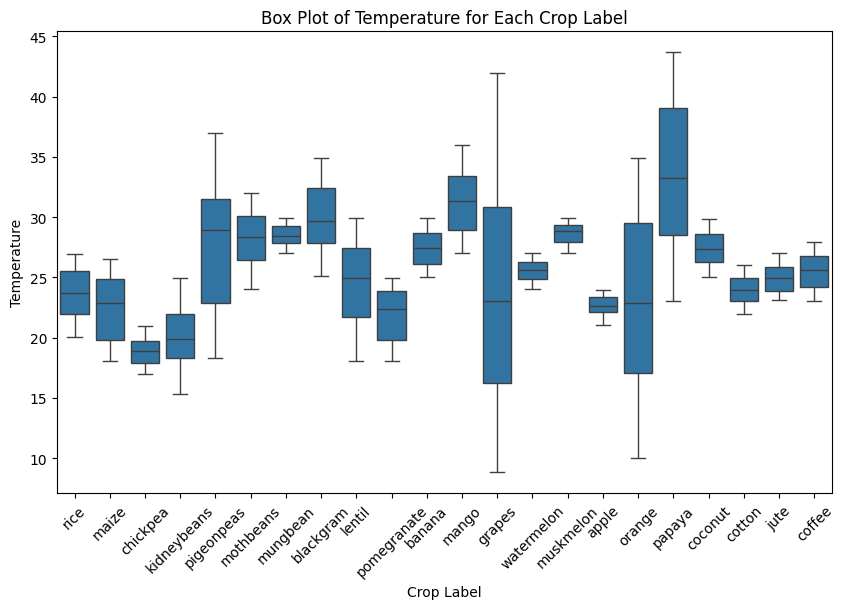

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='temperature', data=df)
plt.xlabel('Crop Label')
plt.ylabel('Temperature')
plt.title('Box Plot of Temperature for Each Crop Label')
plt.xticks(rotation=45)
plt.show()

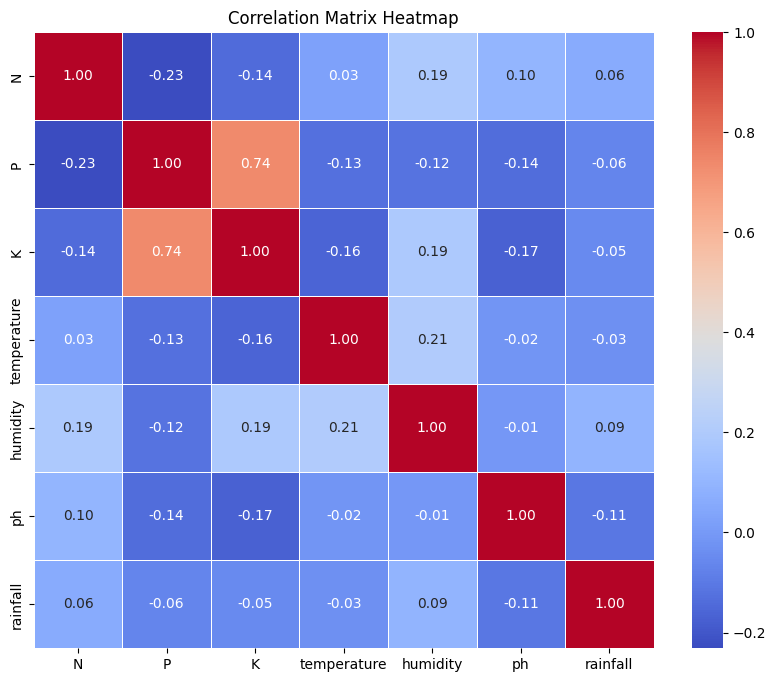

In [11]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

/var/folders/p5/ks5clj3s0rv4fdvvgz14rlbr0000gn/T/ipykernel_16446/3076696713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set3')


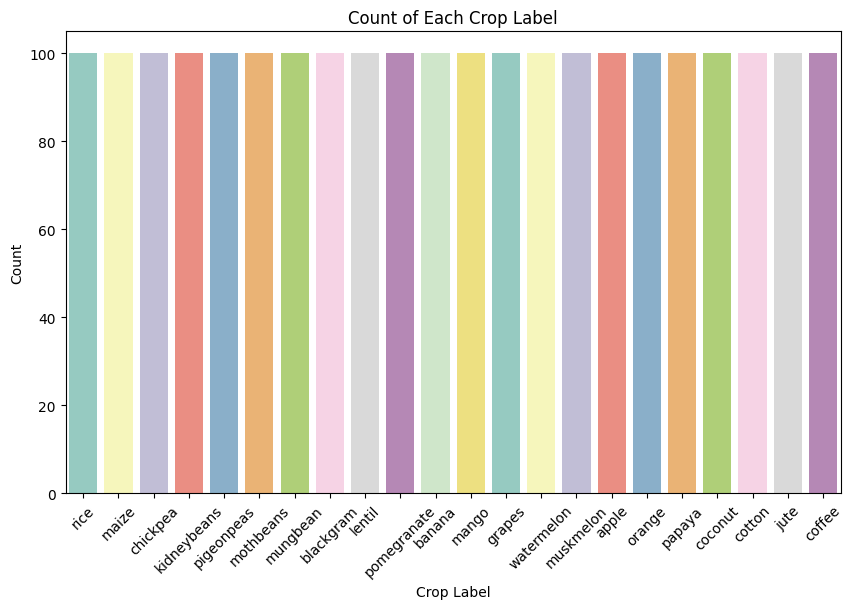

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='Set3')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Count of Each Crop Label')
plt.xticks(rotation=45)
plt.show()

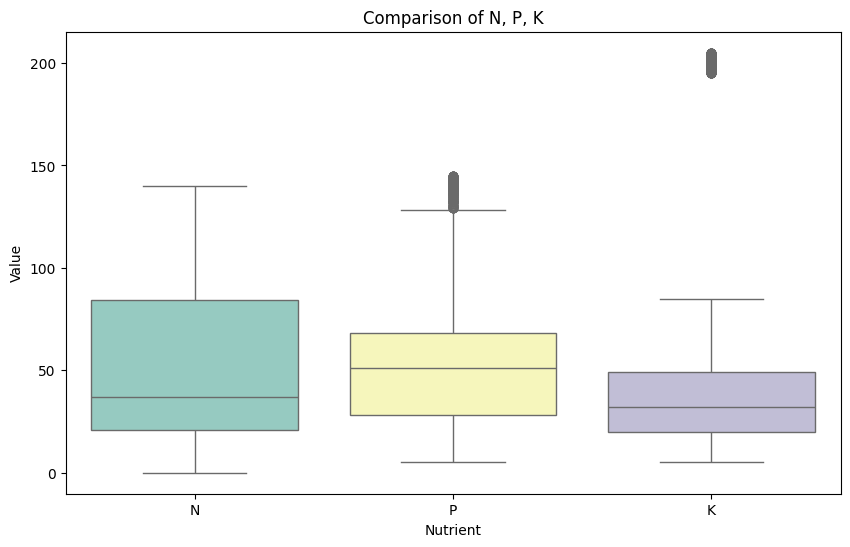

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['N', 'P', 'K']], palette='Set3')
plt.title('Comparison of N, P, K')
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.show()

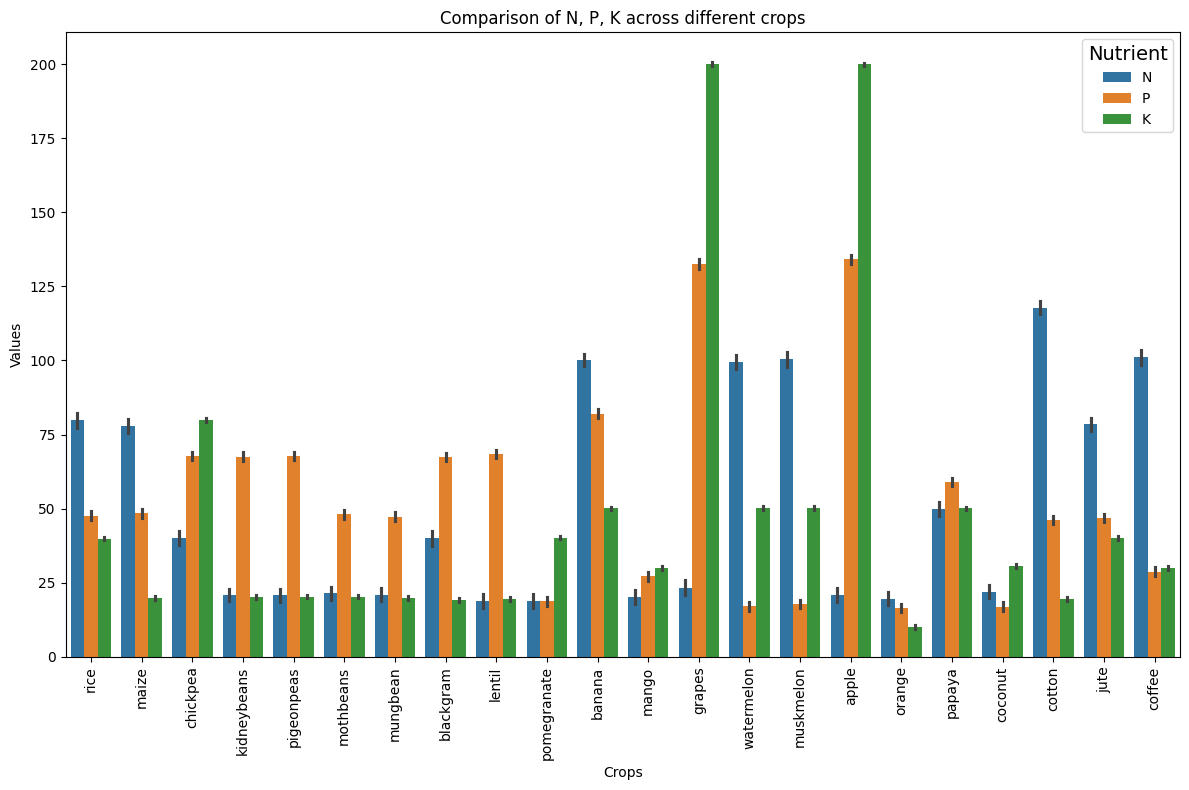

In [14]:

dfm = df.melt(id_vars=['label'], value_vars=['N', 'P', 'K'], var_name='Nutrient', value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=dfm, x='label', y='Value', hue='Nutrient', dodge=True)
plt.xlabel('Crops')
plt.ylabel('Values')
plt.title('Comparison of N, P, K across different crops')
plt.xticks(rotation=90)
plt.legend(title='Nutrient', title_fontsize='14')
plt.tight_layout()
plt.show()

In [15]:
#Seperating features and target label

In [16]:
acc=[]
model=[]

In [17]:
features=df[['N','P','K','temperature','humidity','ph','rainfall']]
target=df['label']
labels=df['label']

In [18]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [19]:

target_encoded = label_encoder.fit_transform(target)

In [20]:
target_encoded

array([20, 20, 20, ...,  5,  5,  5])

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(features,target_encoded,test_size=0.2,random_state=42)

In [22]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,ytrain)

predicted_values=DecisionTree.predict(Xtest)
X=metrics.accuracy_score(ytest,predicted_values)
acc.append(X)
model.append('Decision Tree')
print("Decision Tree's accuracy is :",X*100)

Decision Tree's accuracy is : 86.5909090909091


In [23]:

from sklearn.model_selection import cross_val_score

In [24]:
score=cross_val_score(DecisionTree,features,target,cv=5)

score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [25]:
from xgboost import XGBClassifier
import pickle

XB=XGBClassifier()
XB.fit(Xtrain,ytrain)

predicted_values=XB.predict(Xtest)

X=metrics.accuracy_score(ytest ,predicted_values)
acc.append(X)
model.append('XGBoost')
print("XGBoost's Accuracy is: ",X*100,"%")

print(classification_report(ytest,predicted_values))

# Save the model to a pickle file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(XB, file)
    
print("Model saved to 'xgboost_model.pkl'")

XGBoost's Accuracy is:  98.63636363636363 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00    

/var/folders/p5/ks5clj3s0rv4fdvvgz14rlbr0000gn/T/ipykernel_16446/3531028068.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

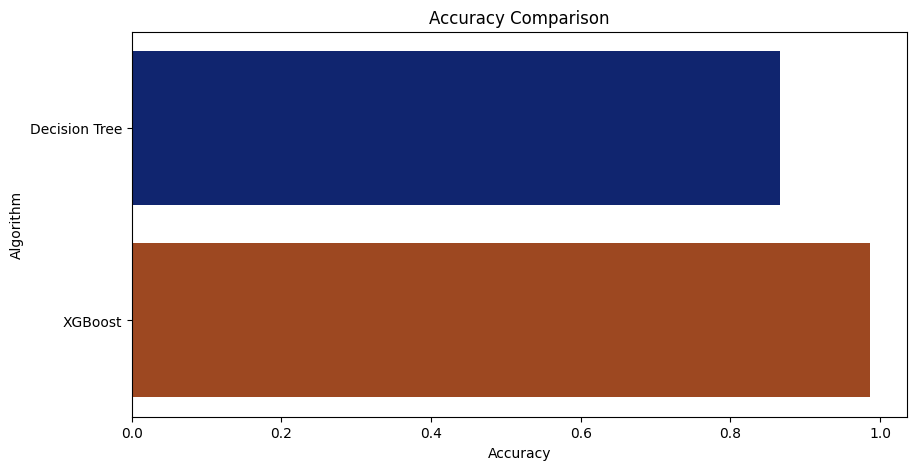

In [26]:

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions on training data
train_predicted_values = XB.predict(Xtrain)

# Training accuracy
train_accuracy = accuracy_score(ytrain, train_predicted_values)
print("Training Accuracy: ", train_accuracy * 100, "%")

# Test accuracy
test_accuracy = accuracy_score(ytest, predicted_values)
print("Test Accuracy: ", test_accuracy * 100, "%")

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model does not seem to be overfitting.")


Training Accuracy:  100.0 %
Test Accuracy:  98.63636363636363 %
The model might be overfitting.


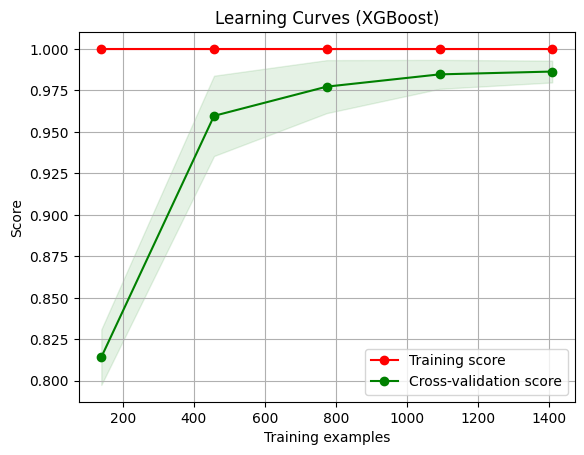

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(XB, Xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and std
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curves (XGBoost)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

# Plot the mean scores with the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pickle

# Split the training data into training and validation sets
Xtrain_new, Xval, ytrain_new, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Define the model with initial parameters
XB = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,  # L1 regularization term
    reg_lambda=0.1  # L2 regularization term
)

# Initialize variables for early stopping
best_val_score = float('inf')
patience = 10
best_iteration = 0
n_iterations = 0

for n_iter in range(1, XB.n_estimators + 1):
    # Fit the model up to the current iteration
    XB.n_estimators = n_iter
    XB.fit(Xtrain_new, ytrain_new, 
           eval_set=[(Xval, yval)], 
           verbose=False)

    # Check the validation score
    val_score = XB.score(Xval, yval)
    if val_score < best_val_score:
        best_val_score = val_score
        best_iteration = n_iter
        n_iterations = 0
    else:
        n_iterations += 1

    if n_iterations >= patience:
        print(f"Early stopping at iteration {n_iter}")
        break

# Restore the best iteration
XB.n_estimators = best_iteration

# Predictions on training data
train_predicted_values = XB.predict(Xtrain_new)
train_accuracy = accuracy_score(ytrain_new, train_predicted_values)

# Predictions on validation data
val_predicted_values = XB.predict(Xval)
val_accuracy = accuracy_score(yval, val_predicted_values)

# Predictions on test data
test_predicted_values = XB.predict(Xtest)
test_accuracy = accuracy_score(ytest, test_predicted_values)

# Print accuracies
print("Training Accuracy: ", train_accuracy * 100, "%")
print("Validation Accuracy: ", val_accuracy * 100, "%")
print("Test Accuracy: ", test_accuracy * 100, "%")

# Detailed classification reports
print("\nTraining Classification Report:\n", classification_report(ytrain_new, train_predicted_values))
print("\nValidation Classification Report:\n", classification_report(yval, val_predicted_values))
print("\nTest Classification Report:\n", classification_report(ytest, test_predicted_values))

# Save the model to a pickle file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(XB, file)

print("Model saved to 'xgboost_model.pkl'")

# Check for overfitting
if train_accuracy - val_accuracy > 0.1:
    print("The model might be overfitting.")
else:
    print("The model seems to be generalizing well.")


Early stopping at iteration 11
Training Accuracy:  99.07670454545455 %
Validation Accuracy:  97.72727272727273 %
Test Accuracy:  96.81818181818181 %

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00        62
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        68
           8       0.83      1.00      0.91        54
           9       1.00      1.00      1.00        62
          10       0.99      1.00      0.99        70
          11       1.00      1.00      1.00        58
          12       0.99      1.00      0.99        67
          13       1.00      0.99      0.99        67
      